In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df_poverty = pd.read_csv('data/povertyByStateYear.csv')

In [3]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [4]:
df_poverty.describe()

,year,povertyPercentage
count,884.000000,832.000000
mean,2011.998869,12.535817
std,4.902330,3.205233
min,2004.000000,5.400000
25%,2008.000000,10.200000
50%,2012.000000,12.000000
75%,2016.000000,14.700000
max,2020.000000,21.800000


In [5]:
#check for missing values
df_poverty.isnull().sum()

state                 0
year                  0
povertyPercentage    52
dtype: int64

In [6]:
#check for duplicate rows
df_poverty.duplicated().sum()

0

<Axes: >

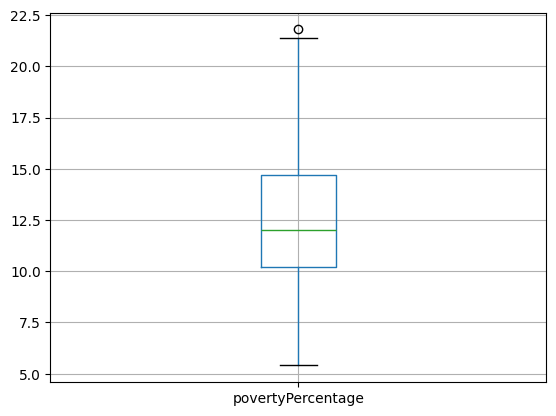

In [7]:
#check for outliers on the poverty rate
df_poverty.boxplot(column=['povertyPercentage'])

In [8]:
df_poverty['povertyPercentage'].describe()

count    832.000000
mean      12.535817
std        3.205233
min        5.400000
25%       10.200000
50%       12.000000
75%       14.700000
max       21.800000
Name: povertyPercentage, dtype: float64

In [14]:
#check for invalid state names
df_poverty['state'].unique()
#Print out the state names that are invalid
# df_poverty.loc[~df_poverty['state'].isin(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
#                                             'Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan',
#                                             'Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
#                                             'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
#                                             'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'
#                                             ,'District of Columbia'])]

#Count number of rows with invalid state names
df_poverty.loc[~df_poverty['state'].isin(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
                                            'Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan',
                                            'Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
                                            'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
                                            'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'
                                            ,'District of Columbia'])].count()

#Drop rows with invalid state names
df_poverty = df_poverty.loc[df_poverty['state'].isin(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
                                            'Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan',
                                            'Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
                                            'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
                                            'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'
                                            ,'District of Columbia'])]




In [22]:
#Now check for invalida states again
df_poverty['state'].unique()
#Print the number of states
df_poverty['state'].nunique()


51

In [23]:
#Check for columns with mixed data types
df_poverty.dtypes

state                 object
year                   int64
povertyPercentage    float64
dtype: object

In [24]:
#check for invalid years
df_poverty['year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004], dtype=int64)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20364\870705244.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


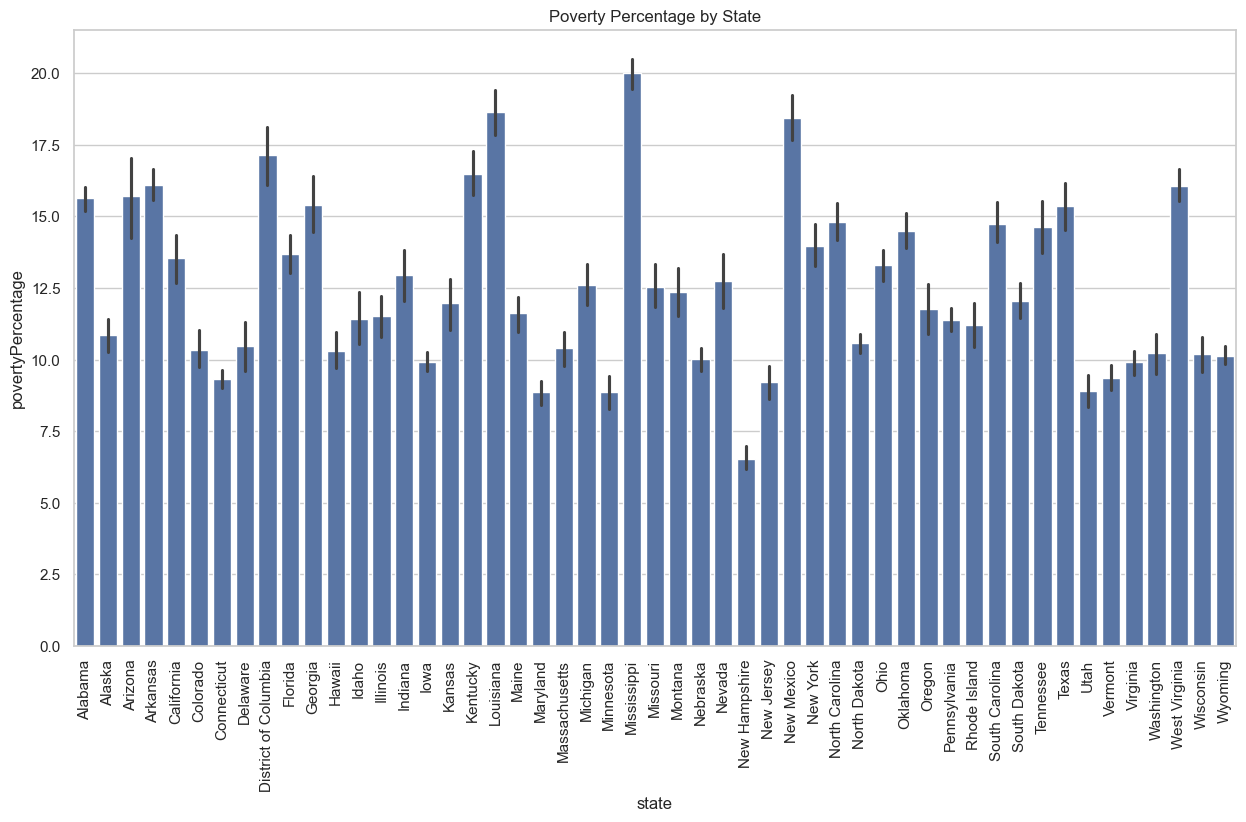

In [25]:
#Visualize the poverty percentage by state
plt.figure(figsize=(15,8))
sn.set(style="whitegrid")
ax = sn.barplot(x="state", y="povertyPercentage", data=df_poverty)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Poverty Percentage by State')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20364\2837544862.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


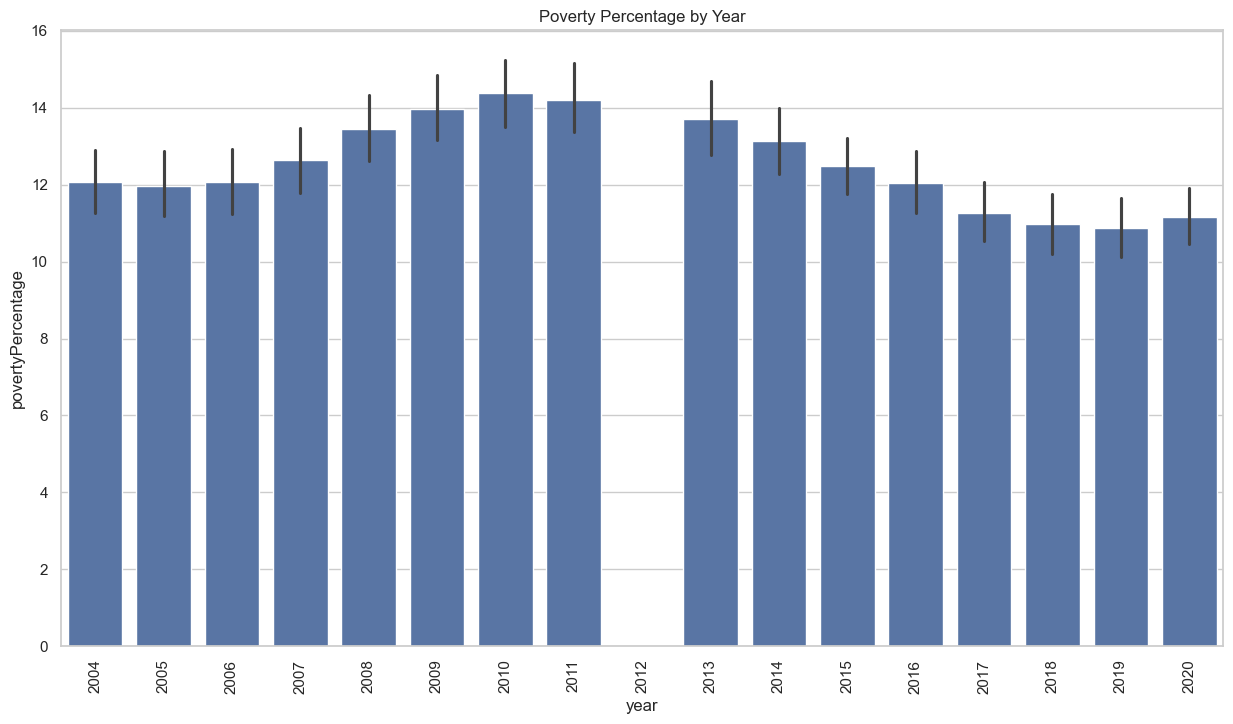

In [26]:
#Visualize the poverty percentage by year
plt.figure(figsize=(15,8))
sn.set(style="whitegrid")
ax = sn.barplot(x="year", y="povertyPercentage", data=df_poverty)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Poverty Percentage by Year')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20364\408214880.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


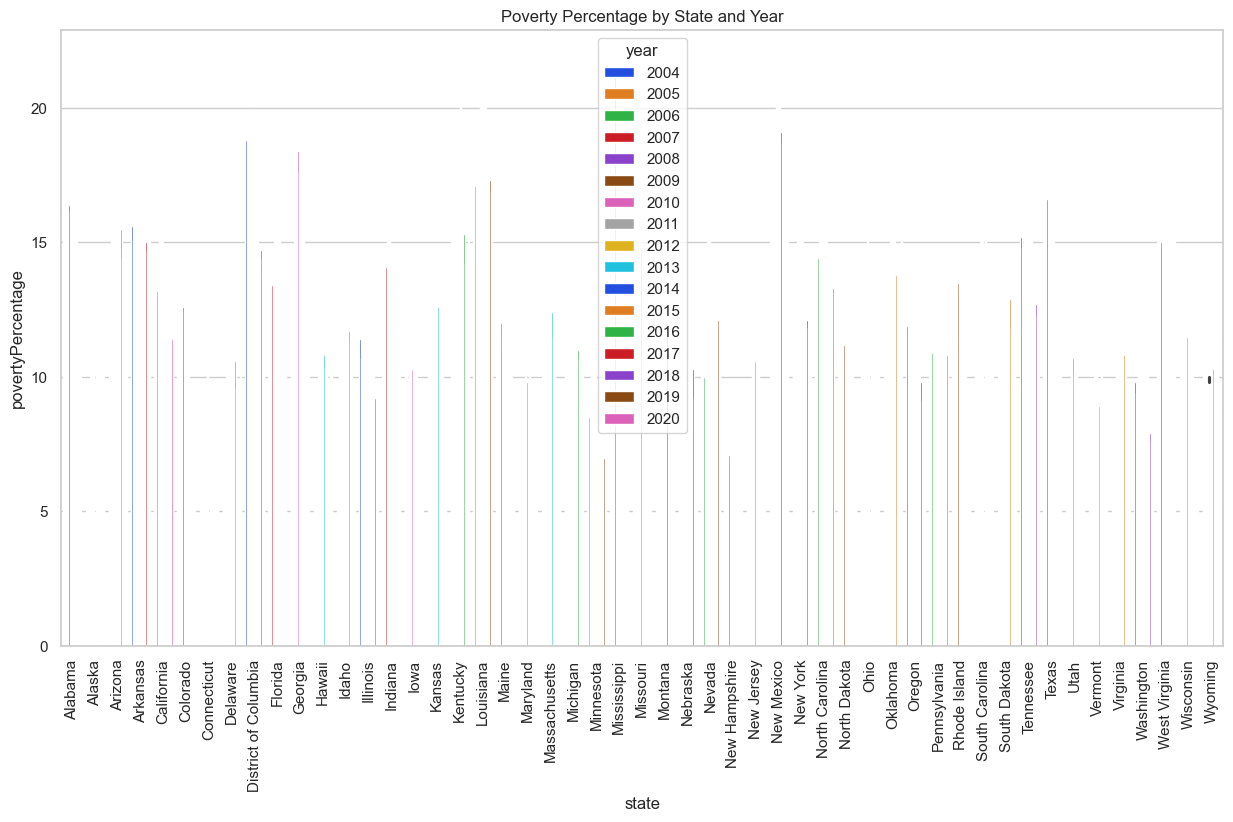

In [35]:
#Visualize the poverty percentage by state and year Use visible color palette.
plt.figure(figsize=(15,8))
sn.set(style="whitegrid")
ax = sn.barplot(x="state", y="povertyPercentage", hue="year", data=df_poverty, palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Poverty Percentage by State and Year')
plt.show()

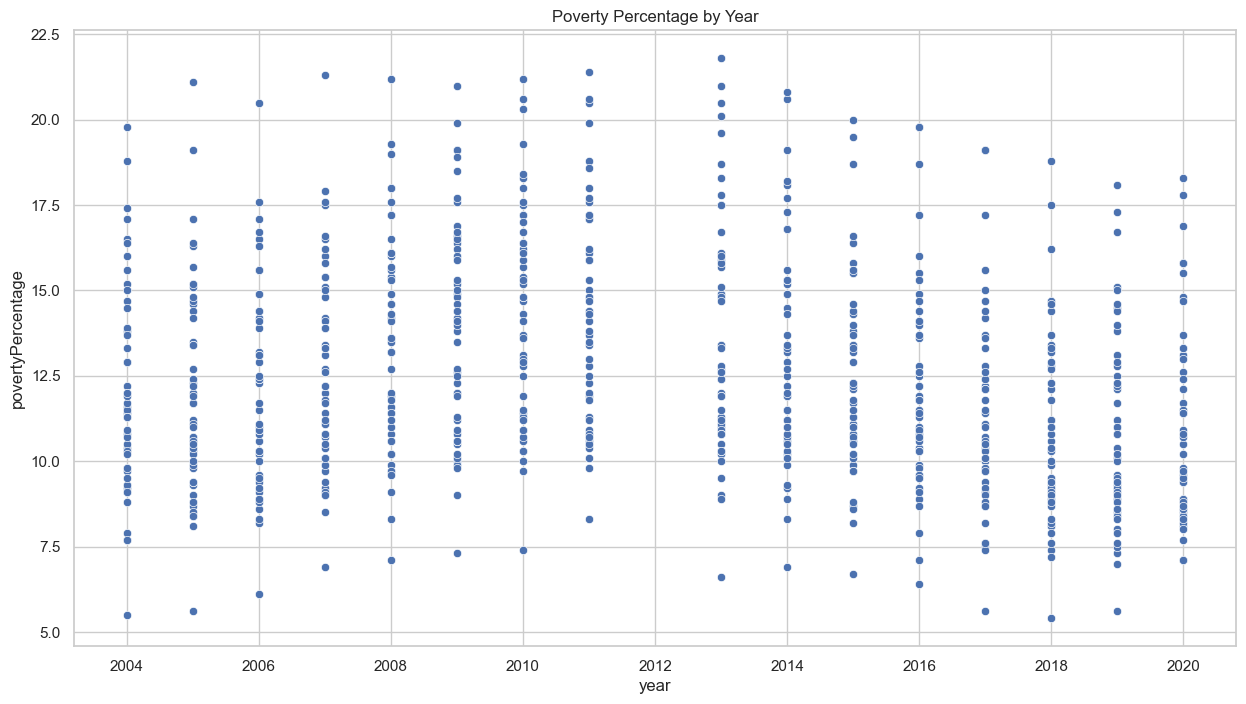

In [37]:
#Visualize any correlations between the poverty percentage and the year
plt.figure(figsize=(15,8))
sn.set(style="whitegrid")
ax = sn.scatterplot(x="year", y="povertyPercentage", data=df_poverty)
plt.title('Poverty Percentage by Year')
plt.show()


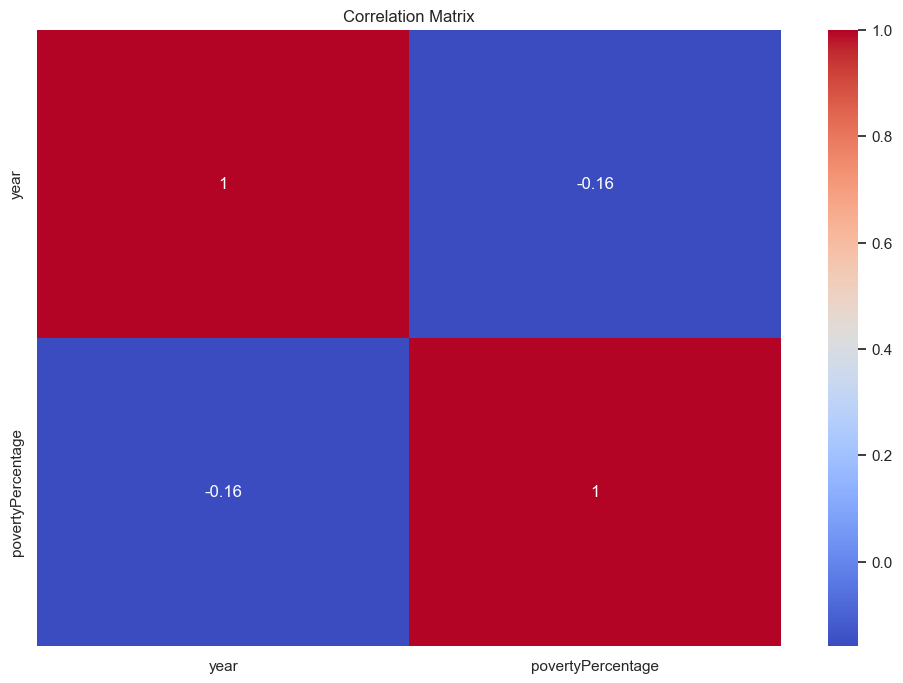

In [42]:
#Select the numerical columns and perform a correlation analysis
number_fields = ['year','povertyPercentage']

correlation_matrix = df_poverty[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [43]:
summary_stats = df_poverty.describe(include='all')
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           state         year  povertyPercentage
count       867   867.000000         816.000000
unique       51          NaN                NaN
top     Alabama          NaN                NaN
freq         17          NaN                NaN
mean        NaN  2011.998847          12.526103
std         NaN     4.902396           3.230733
min         NaN  2004.000000           5.400000
25%         NaN  2008.000000          10.200000
50%         NaN  2012.000000          12.000000
75%         NaN  2016.000000          14.700000
max         NaN  2020.000000          21.800000


In [44]:
#Poverty percentage has some null values.  Replace the null values with the mean
df_poverty['povertyPercentage'].fillna(df_poverty['povertyPercentage'].mean(), inplace=True)


In [45]:
#check for missing values
df_poverty.isnull().sum()

state                0
year                 0
povertyPercentage    0
dtype: int64

In [46]:
summary_stats = df_poverty.describe(include='all')
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           state         year  povertyPercentage
count       867   867.000000         867.000000
unique       51          NaN                NaN
top     Alabama          NaN                NaN
freq         17          NaN                NaN
mean        NaN  2011.998847          12.526103
std         NaN     4.902396           3.134158
min         NaN  2004.000000           5.400000
25%         NaN  2008.000000          10.300000
50%         NaN  2012.000000          12.300000
75%         NaN  2016.000000          14.600000
max         NaN  2020.000000          21.800000
